----
## **<font color="crimson"> Se parece a 914_anom pero está más ordenado, aunque no calcula bien los CAO, puedo pasar los dataframe con los CAO acá </font>**

----
## **<font color="crimson"> El otro 914 ya está ordenado y con los dataframe de CAO </font>**

In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

  Using cached cmcrameri-1.9-py3-none-any.whl.metadata (4.6 kB)
Using cached cmcrameri-1.9-py3-none-any.whl (277 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm
import matplotlib.patches as patches

### **<font color="Purple"> Datos de HadGEM3 </font>**

### **<font color="olive"> Temperatura </font>**

In [10]:
tas_file = 'datasetsok/tasday79.nc'

In [12]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']
tas

<xarray.DataArray 'tas' (time: 12960, lat: 144, lon: 192)> Size: 1GB
[358318080 values with dtype=float32]
Coordinates:
  * time     (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...

In [14]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

##### Para promedios móviles

In [15]:
regionHG = tas_inviernos.sel(lat=slice(5, 50), lon=slice(227,297)) #solo djf, meses 1,2,12 

In [16]:
tas_climyear = regionHG.groupby('time.year').mean('time')

In [17]:
tasclimyearsuav = tas_climyear.rolling(year=20, center=True, min_periods=15).mean()

In [18]:
tas_climyearstd = regionHG.groupby('time.year').std('time')

In [19]:
tassuavstd = tas_climyearstd.rolling(year=20, center=True, min_periods=15).mean()

In [20]:
print(tasclimyearsuav)
print(tas_climyearstd)

<xarray.DataArray 'tas' (year: 36, lat: 36, lon: 37)> Size: 192kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan

##### Climatología diaria

In [22]:
file_anomtas = 'datasetsok/anomalias_day_tasHG.nc'
anom_tas = xr.open_dataset(file_anomtas)
anomaliasday_tas = anom_tas['tas']

In [30]:
anomaliasday_tas

<xarray.DataArray 'tas' (time: 12960, lat: 36, lon: 37)> Size: 69MB
array([[[ -1.151676,  -0.93668 , ...,  -1.023512,  -1.168858],
        [ -1.050339,  -1.060326, ...,  -1.309172,  -2.110378],
        ...,
        [ -3.173443,  -2.650841, ...,  -5.005424,  -7.90813 ],
        [ -2.936751,  -2.189821, ...,  -4.655781,  -7.442072]],

       [[ -1.140377,  -0.893314, ...,  -0.977625,  -1.068918],
        [ -1.182236,  -0.947659, ...,  -0.939785,  -1.649744],
        ...,
        [ -1.681609,  -2.130687, ..., -13.10957 ,  -7.735348],
        [ -1.688931,  -1.907573, ..., -13.671185,  -8.025835]],

       ...,

       [[  1.284515,   1.398119, ...,   2.292034,   0.861559],
        [  0.823578,   0.763866, ...,   1.729696,   1.793062],
        ...,
        [ -0.564662,  -0.728812, ...,  15.34975 ,   9.239567],
        [ -0.722081,  -1.096626, ...,  19.16059 ,  10.567413]],

       [[  1.514523,   1.577881, ...,   2.219509,   0.936405],
        [  1.254959,   1.197634, ...,   2.769121,   2.793049],
        ...,
        [ -0.05106 ,  -1.014946, ...,   9.363142,   4.395371],
        [ -0.029885,  -0.851059, ...,  13.518234,   6.378695]]], dtype=float32)
Coordinates:
  * time       (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon        (lon) float64 296B 227.8 229.7 231.6 233.4 ... 291.6 293.4 295.3
  * lat        (lat) float64 288B 5.625 6.875 8.125 9.375 ... 46.88 48.12 49.38
    height     (time) float64 104kB ...
    dayofyear  (time) int64 104kB ...

### **<font color="olive"> Viento </font>**

In [32]:
file_uHG = 'datasetsok/uday_250hpa_HG_1979_2014.nc'

In [33]:
u_ds=xr.open_dataset(file_uHG)
uHG=u_ds['ua']  

In [34]:
u_inviernosHG = uHG.sel(time=uHG ['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [35]:
file_anomua = 'datasetsok/anomalias_day_uHG.nc'
anom_ua = xr.open_dataset(file_anomua)
anomaliasday_ua = anom_ua['ua']

In [44]:
anomaliasday_ua

<xarray.DataArray 'ua' (time: 12960, lat: 25, lon: 33)> Size: 43MB
array([[[  5.340522,   2.379225, ...,   2.330307,  -0.34392 ],
        [  4.840705,   1.257297, ...,   4.124739,   0.613027],
        ...,
        [ 21.633438,  22.17691 , ...,   2.343353,   0.639778],
        [ 26.633156,  27.291676, ...,   5.828194,   4.763947]],

       [[  0.55826 ,   1.764135, ...,  -0.350556,  -4.524855],
        [  5.235248,   5.57915 , ...,  -0.813072,  -4.919147],
        ...,
        [  7.238083,   8.184174, ...,   7.587421,   6.301033],
        [  4.457359,   4.490698, ...,  15.341423,  14.525513]],

       ...,

       [[ -9.920648,  -9.596167, ...,  -1.915252,  -1.922474],
        [-11.922471, -11.785349, ...,  -0.17399 ,  -0.439086],
        ...,
        [ 12.359339,  14.406773, ...,  11.924534,   9.618015],
        [  6.19389 ,   7.808668, ...,   8.444004,   8.917973]],

       [[-11.517997, -10.474683, ...,   0.542138,   1.743336],
        [-13.383662, -13.567749, ...,   2.238055,   3.460546],
        ...,
        [  9.511606,   8.919224, ...,   3.415665,   7.320087],
        [  4.47159 ,   3.859272, ...,  -4.167404,   0.478832]]], dtype=float32)
Coordinates:
  * time       (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon        (lon) float64 264B 232.5 234.4 236.2 238.1 ... 288.8 290.6 292.5
  * lat        (lat) float64 200B 10.0 11.25 12.5 13.75 ... 37.5 38.75 40.0
    plev       (time) float64 104kB ...
    dayofyear  (time) int64 104kB ...

### **<font color="Purple"> Datos de ERA-5 </font>**

### **<font color="olive"> Temperatura</font>**

In [45]:
filet2m_era5 = 'datasetsok/t2mC_1979_2024.nc'

In [46]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']
t2m

<xarray.DataArray 't2m' (time: 16802, latitude: 41, longitude: 53)> Size: 146MB
[36510746 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 328B 39.0 38.25 37.5 36.75 ... 10.5 9.75 9.0
  * longitude  (longitude) float64 424B -120.0 -119.2 -118.5 ... -81.75 -81.0
  * time       (time) datetime64[ns] 134kB 1979-01-01 1979-01-02 ... 2024-12-31
    number     int64 8B ...
    surface    float64 8B ...

In [47]:
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [48]:
regionE5 = t2m_inviernos.sel(latitude=slice(50, 5), longitude=slice(227,297)) #solo djf, meses 1,2,12 

##### Para promedios móviles

In [49]:
t2m_climyear = regionE5.groupby('time.year').mean('time')

In [50]:
t2mclimyearsuav = t2m_climyear.rolling(year=20, center=True, min_periods=15).mean()

In [51]:
t2m_climyearstd = regionE5.groupby('time.year').std('time')

In [52]:
t2msuavstd = t2m_climyearstd.rolling(year=20, center=True, min_periods=15).mean()

##### Climatología diaria

In [55]:
file_anomt2m = 'datasetsok/anomalias_day_t2mE5.nc'
anom_t2m = xr.open_dataset(file_anomt2m)
anomaliasday_t2m = anom_t2m['t2m']

### **<font color="olive"> Viento </font>**

In [67]:
fileu_era5 = 'datasetsok/u_daily_500_200_1979-2024.nc'

In [68]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [70]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(pressure_level=200)

In [289]:
# u200E5_anual=u200E5.mean(dim='time') 

In [71]:
# u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
# uE5_DJF = u200E5_season[0]

In [72]:
u_inviernosE5 = u200E5.sel(time=u200E5['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [73]:
file_anomu = 'datasetsok/anomalias_day_uE5.nc'
anom_u = xr.open_dataset(file_anomu)
anomaliasday_u = anom_u['u']

### **<font color="olive"> CAOs de HadGEM </font>**

In [94]:
caosHGdf = pd.read_csv('datasetsok/fechasCAOs_HG.csv')

In [109]:
def CAOS_MXgp(Tdias, mean_mv, std_mv):
    """
    Tdias son todos los días
    mean_mv es el promedio móvil para cada 10 años
    std_mv es la desviación estándar para cada 10 años
    """
    
    # Usar la temperatura suavizada (promedio móvil de 10 años)
    mean = mean_mv.values  # Temperaturas suavizadas (promedio móvil)
    desv_est = std_mv.values  # Desviación estándar suavizada (promedio móvil)
    years=mean_mv.year.values
    # Find the first index where value is not NaN
    first_valid_index = np.argmax(~np.isnan(mean))
    # Find the final where value is not NaN
    last_valid_index = np.argmax(np.isnan(mean))
    print(last_valid_index)
    init_year=years[first_valid_index]
    last_valid_index = np.where(~np.isnan(mean))[0][-1]
    fyear=years[last_valid_index]
    print(init_year,fyear)
    dias_CAO = []
    temp_list = []

    for i in range(0,len(Tdias)-1,1): 
        # Obtener el año del día actual
        year = Tdias['time'].dt.year[i]  # Año del día actual
        
        # Calcular el índice para la serie de 1979 a 2014
        index = year - 1979  # Calculamos el índice para la serie de 1979 a 2014
       # print(year.values)
        if year<init_year:
            index=first_valid_index
        if year>fyear:
            index=last_valid_index
            # 🔍 Find the index of the last non-NaN value
            
        # Verificar que el índice esté dentro del rango correcto
        if index < 0 or index >= len(mean):
            continue  # Si el índice está fuera de rango, se salta esa iteración
        
        # Obtener la temperatura media suavizada y la desviación estándar suavizada para el año correspondiente
        Tmean_suavizada = mean[index]  # Obtener el promedio para ese año
        
        Tstd_suavizada = desv_est[index]  # Desviación estándar para ese año
        #print(Tstd_suavizada)
        # Condición de CAO con la temperatura suavizada y la desviación estándar suavizada
        condicionCAO = Tmean_suavizada - 2 * Tstd_suavizada
        #print(Tdias[i],condicionCAO)
        #print(Tdias['time'][i].values,float(Tdias[i]),float(condicionCAO))
        # Verificar si los días cumplen la condición de CAO (temperatura inferior al umbral)
        if Tdias[i] < condicionCAO and Tdias[i+1] < condicionCAO:
            dias_CAO.append(i)
            #print(Tdias[i],condicionCAO)
            #quit()
            dias_CAO.append(i + 1)
        #if i>10000:
        #    break
    # Eliminar duplicados en los índices de días CAO
    dias_CAOS = list(set(dias_CAO))  # Eliminar duplicados, pero convertir en lista
    print(len(dias_CAOS))
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAOS]  # Aquí accedes correctamente con los índices de días_CAOS
    
    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = [pd.to_datetime(str(date)) for date in dias_CAO_dates]
    
    # Crear el diccionario con fechas y sus índices
    fechas_indices = {fecha: dias_CAOS[i] for i, fecha in enumerate(fechas_CAO_datetime)}
        
    # Obtener las temperaturas de los días identificados como CAO
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values  # Obtener la temperatura del día indicado
        temp_list.append(temperatura)

    # Promedio de las temperaturas en los días CAO
    promedioT = np.mean(temp_list)
   
    return {'fechas': fechas_indices, 'temperaturas': temp_list, 'freq': len(dias_CAOS) / 36, 'promedioT': promedioT}


In [96]:
#Elegir un cuadro de 4x4
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [97]:
# #Elegir otro cuadro de 4x4
latitudes2 = tas_inviernos.sel(lat=slice(17,22))
longitudes2 = latitudes2.sel(lon=slice(255,262))

In [98]:
weights = np.cos(np.deg2rad(latitudes.lat))
weights.name = "weights"

In [99]:
weights2 = np.cos(np.deg2rad(latitudes2.lat))
weights2.name = "weights"

In [100]:
tas_weighted = longitudes.weighted(weights)

In [101]:
tas_weighted2 = longitudes2.weighted(weights2)

In [102]:
norte = tas_weighted.mean(['lon','lat']) 

In [103]:
norte2 = tas_weighted2.mean(['lon','lat']) 

In [104]:
tasclimyearsuav_alineado = tasclimyearsuav.sel(lat=slice(22,27),lon=slice(255,262)).mean(dim=['lat','lon'])
tassuavstd_alineado = tassuavstd.sel(lat=slice(22,27),lon=slice(255,262)).mean(dim=['lat','lon'])

In [105]:
# cambiarle el cuadro
tasclimyearsuav_alineado2 = tasclimyearsuav.sel(lat=slice(17,22),lon=slice(255,262)).mean(dim=['lat','lon'])
tassuavstd_alineado2 = tassuavstd.sel(lat=slice(17,22),lon=slice(255,262)).mean(dim=['lat','lon'])

In [106]:
CAOsHG = CAOS_MXgp(norte,tasclimyearsuav_alineado,tassuavstd_alineado) 
fechas_caoHG = CAOsHG['fechas']

0
1984 2010
48


In [107]:
CAOsHG2 = CAOS_MXgp(norte2,tasclimyearsuav_alineado2,tassuavstd_alineado2) 
fechas_caoHG2 = CAOsHG2['fechas']

0
1984 2010
23


In [108]:
len(fechas_caoHG)

48

In [310]:
len(fechas_caoHG2)

23

In [113]:
indicesHG=[fechas_caoHG[key] for key in CAOsHG['fechas'].keys()]

In [312]:
indicesHG2=[fechas_caoHG2[key] for key in CAOsHG2['fechas'].keys()]

In [313]:
tempsHG = tas_inviernos.isel(time=indicesHG)

In [314]:
tempsHG2 = tas_inviernos.isel(time=indicesHG2)

In [315]:
tempsCAOHG=tempsHG.mean('time')
tempsCAOHG2=tempsHG2.mean('time')

In [316]:
anomaliaHG = tempsCAOHG - tas_djf

In [317]:
#VIENTO
u_et_caoHG = u_inviernosHG.isel(time=indicesHG)

In [318]:
vientoCAOHG = u_et_caoHG.mean('time')

In [319]:
u_anomaliaHG = vientoCAOHG - u_DJFHG

### **<font color="olive"> CAOs de ERA-5</font>**

In [320]:
def CAOS_MXgpE5(Tdias, mean_mv, std_mv):
    """
    Tdias son todos los días
    mean_mv es el promedio móvil para cada 10 años
    std_mv es la desviación estándar para cada 10 años
    """
    
    # Usar la temperatura suavizada (promedio móvil de 10 años)
    mean = mean_mv.values  # Temperaturas suavizadas (promedio móvil)
    desv_est = std_mv.values  # Desviación estándar suavizada (promedio móvil)
    years=mean_mv.year.values
    # Find the first index where value is not NaN
    first_valid_index = np.argmax(~np.isnan(mean))
    # Find the final where value is not NaN
    last_valid_index = np.argmax(np.isnan(mean))
    print(last_valid_index)
    init_year=years[first_valid_index]
    last_valid_index = np.where(~np.isnan(mean))[0][-1]
    fyear=years[last_valid_index]
    print(init_year,fyear)
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias)-1): 
        # Obtener el año del día actual
        year = Tdias['time'].dt.year[i]  # Año del día actual
        
        # Calcular el índice para la serie de 1979 a 2019
        index = year - 1979  # Calculamos el índice para la serie de 1979 a 2019
        # print(year.values)
        if year<init_year:
            index=first_valid_index
        elif year>fyear:
            index=last_valid_index
        # Verificar que el índice esté dentro del rango correcto
        if index < 0 or index >= len(mean):
            continue  # Si el índice está fuera de rango, se salta esa iteración
        
        # Obtener la temperatura media suavizada y la desviación estándar suavizada para el año correspondiente
        Tmean_suavizada = mean[index]  # Obtener el promedio para ese año
        Tstd_suavizada = desv_est[index]  # Desviación estándar para ese año
        
        # Condición de CAO con la temperatura suavizada y la desviación estándar suavizada
        condicionCAO = Tmean_suavizada - 2 * Tstd_suavizada
        
        # Verificar si los días cumplen la condición de CAO (temperatura inferior al umbral)
        if Tdias[i] < condicionCAO and Tdias[i+1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)

    # Eliminar duplicados en los índices de días CAO
    dias_CAOS = list(set(dias_CAO))  # Eliminar duplicados, pero convertir en lista

    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAOS]  # Aquí accedes correctamente con los índices de días_CAOS
    
    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = [pd.to_datetime(str(date)) for date in dias_CAO_dates]
    
    # Crear el diccionario con fechas y sus índices
    fechas_indices = {fecha: dias_CAOS[i] for i, fecha in enumerate(fechas_CAO_datetime)}
        
    # Obtener las temperaturas de los días identificados como CAO
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values  # Obtener la temperatura del día indicado
        temp_list.append(temperatura)

    # Promedio de las temperaturas en los días CAO
    promedioT = np.mean(temp_list)
   
    return {'fechas': fechas_indices, 'temperaturas': temp_list, 'freq': len(dias_CAOS) / 36, 'promedioT': promedioT}


In [321]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE5 = t2m_inviernos.sel(latitude=slice(27,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [322]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE52 = t2m_inviernos.sel(latitude=slice(22,17)) 
mx_slicedE52 = mx_slicedE52.sel(longitude=slice(255,262)) 

In [323]:
weights = np.cos(np.deg2rad(mx_slicedE5.latitude))
weights.name = "weights"

In [324]:
weights2 = np.cos(np.deg2rad(mx_slicedE52.latitude))
weights2.name = "weights"

In [325]:
t2m_weighted = mx_slicedE5.weighted(weights)

In [326]:
t2m_weighted2 = mx_slicedE52.weighted(weights2)

In [327]:
norteE5 = t2m_weighted.mean(['longitude','latitude']) #promedio a variable ya pesada

In [328]:
norteE52 = t2m_weighted2.mean(['longitude','latitude']) #promedio a variable ya pesada

In [329]:
t2mclimyearsuav_alineado = t2mclimyearsuav.sel(latitude=slice(27,22),longitude=slice(255,262)).weighted(weights).mean(dim=['latitude','longitude'])
t2msuavstd_alineado = t2msuavstd.sel(latitude=slice(27,22),longitude=slice(255,262)).weighted(weights).mean(dim=['latitude','longitude'])

In [330]:
t2mclimyearsuav_alineado2 = t2mclimyearsuav.sel(latitude=slice(22,17),longitude=slice(255,262)).weighted(weights2).mean(dim=['latitude','longitude'])
t2msuavstd_alineado2 = t2msuavstd.sel(latitude=slice(22,17),longitude=slice(255,262)).weighted(weights2).mean(dim=['latitude','longitude'])

In [331]:
CAOsE5 = CAOS_MXgpE5(norteE5,t2mclimyearsuav_alineado,t2msuavstd_alineado) 
fechas_caoE5= CAOsE5['fechas']

0
1984 2015


In [332]:
CAOsE52 = CAOS_MXgpE5(norteE52,t2mclimyearsuav_alineado2,t2msuavstd_alineado2) 
fechas_caoE52= CAOsE52['fechas']

0
1984 2015


In [333]:
len(fechas_caoE5)

41

In [334]:
len(fechas_caoE52)

37

In [335]:
E5_listindex=[fechas_caoE5[key] for key in CAOsE5['fechas'].keys()]

In [336]:
E5_listindex2=[fechas_caoE52[key] for key in CAOsE52['fechas'].keys()]

In [337]:
tempsE5 = t2m_inviernos.isel(time=E5_listindex)

In [338]:
tempsE52 = t2m_inviernos.isel(time=E5_listindex2)

In [339]:
tempsCAOE5=tempsE5.mean('time')
# tempsCAOE5 #es el promedio del total de CAOS

In [340]:
tempsCAOE52=tempsE52.mean('time')
# tempsCAOE5 #es el promedio del total de CAOS

In [341]:
E5_anomalia=tempsCAOE5-invs_E5

In [342]:
u_et_caoE5 = u_inviernosE5.isel(time=indicesHG)

In [343]:
vientoCAOE5 = u_et_caoE5.mean('time')

In [344]:
u_anomaliaE5 = vientoCAOE5 - uE5_DJF 

##### **<font color="olive"> MÉTODO 1. Ciclo anual temperatura </font>**

In [345]:
# HADGEM --------------
tempsHGday = anomaliasday.isel(time=indicesHG) 
# ERA ---------------------
tempsE5day = anomaliasdayE5.isel(time=E5_listindex)

##### **<font color="olive"> MÉTODO 2. Estacionalidad temperatura </font>**

In [346]:
# HADGEM --------------
tempsHG = tas_inviernos.isel(time=indicesHG)
tempsCAOHG = tempsHG.mean('time') #temperatura promedio en CAOs
tempsHGday_mean = tempsHGday.mean('time') #este ya se mapea 
anomaliaHG = tempsCAOHG - tas_djf #este ya se mapea

# ERA ---------------------

tempsE5 = t2m_inviernos.isel(time=E5_listindex)
tempsCAOE5=tempsE5.mean('time') # temperatura promedio en CAOs, falta anomalía
tempsE5day_mean = tempsE5day.mean('time') #este ya se mapea 
anomaliaE5 = tempsCAOE5 - invs_E5 #este ya se mapea 

##### **<font color="olive"> MÉTODO 1. Ciclo anual viento </font>**

In [347]:
# HADGEM --------------
usHGday = uanomaliasday.isel(time=indicesHG) 
# ERA ---------------------
usE5day = uanomaliasdayE5.isel(time=E5_listindex) 

##### **<font color="olive"> MÉTODO 2. Estacionalidad viento </font>**

In [348]:
# HADGEM -----------
usHG = u_inviernosHG.isel(time=indicesHG)
usCAOHG = usHG.mean('time') #viento promedio en CAOs
usHGday_mean = usHGday.mean('time') #este ya se mapea 
uanomaliaHG = usCAOHG - u_DJFHG #este ya se mapea

# ERA5 ----------------
usE5 = u_inviernosE5.isel(time=E5_listindex)
usCAOE5 = usE5.mean('time') # viento promedio en CAOs, falta anomalía
usE5day_mean = usE5day.mean('time') #este ya se mapea 
uanomaliaE5 = usCAOE5 - uE5_DJF #este ya se mapea 

In [351]:
np.max(tempsCAOHG)

<xarray.DataArray 'tas' ()> Size: 8B
array(31.89505959)
Coordinates:
    height   float64 8B ...

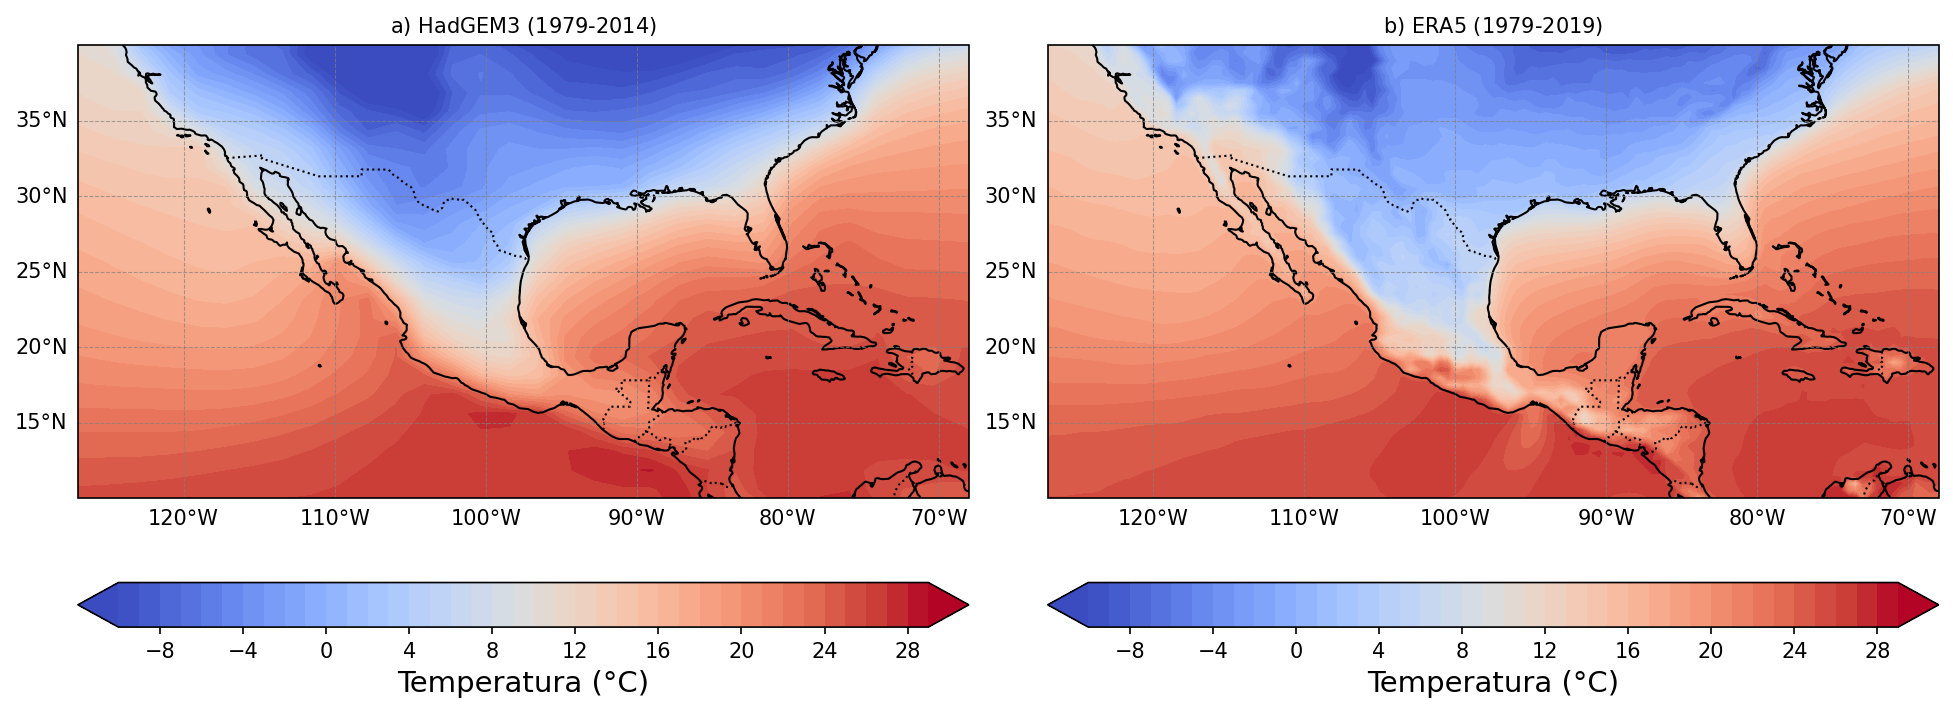

In [352]:
# Usar constrained_layout en lugar de tight_layout
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)

# Subplot 1 - HadGEM3
ax1 = axes[0]
ax1.coastlines()
cs1 = ax1.contourf(tempsCAOHG.lon, tempsCAOHG.lat, tempsCAOHG, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())

gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl1.top_labels = gl1.right_labels = False
ax1.tick_params(labelsize=12)
ax1.set_title('a$)$ HadGEM3 (1979-2014)', fontsize=10)

# Subplot 2 - ERA5
ax2 = axes[1]
ax2.coastlines()
cs2 = ax2.contourf(tempsCAOE5.longitude, tempsCAOE5.latitude, tempsCAOE5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())

gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl2.top_labels = gl2.right_labels = False
ax2.tick_params(labelsize=12) 
ax2.set_title('b$)$ ERA5 (1979-2019)', fontsize=10)

# Colorbar único
cbar = fig.colorbar(cs2, ax=ax1, orientation='horizontal', fraction=0.09, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=14)
cbar = fig.colorbar(cs1, ax=ax2, orientation='horizontal', fraction=0.09, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=14)

# Ajustes finales
fig.subplots_adjust(top=0.95)  # Espacio para el título principal
# fig.set_constrained_layout_pads(w_pad=1)#, h_pad=0.5)
fig.tight_layout(pad=0.5,w_pad=0.5)
# fig.suptitle('Temperatura superficial durante eventos CAO', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

# Guardar figura
plt.savefig("figs/TmeanCAO.png", bbox_inches='tight')

plt.show()


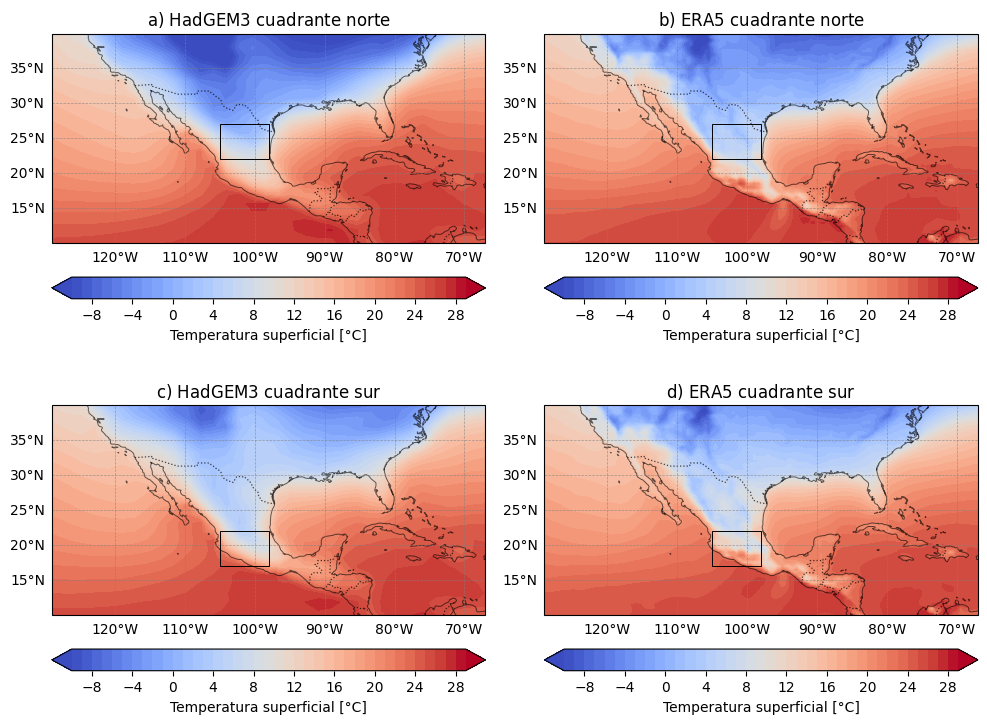

In [353]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(tempsCAOHG.lon, tempsCAOHG.lat, tempsCAOHG, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
rect = patches.Rectangle((255, 22), 262-255, 27-22, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax.add_patch(rect)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('a$)$ HadGEM3 cuadrante norte', fontsize=12)

# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(tempsCAOE5.longitude, tempsCAOE5.latitude, tempsCAOE5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
rect2 = patches.Rectangle((255, 22), 262-255, 27-22, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax.add_patch(rect2)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('b$)$ ERA5 cuadrante norte', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(tempsCAOHG2.lon, tempsCAOHG2.lat, tempsCAOHG2, levels=np.arange(-10,30,1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
rect3 = patches.Rectangle((255, 17), 262-255, 22-17, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax.add_patch(rect3)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('c$)$ HadGEM3 cuadrante sur', fontsize=12)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(tempsCAOE52.longitude, tempsCAOE52.latitude, tempsCAOE52, levels=np.arange(-10,30,1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
rect4 = patches.Rectangle((255, 17), 262-255, 22-17, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax.add_patch(rect4)

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('d$)$ ERA5 cuadrante sur', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Temperatura durante eventos CAO en dos cuadrantes',fontsize=14,color="k",fontstyle='italic',fontweight='bold');


plt.savefig('figs/6_TmeanCAO_NyS')

##### **<font color="olive"> ESTE VA A SER PARA ANOMALÍAS!!!!!!!! </font>**

In [354]:
anomaliaNHG = tempsCAOHG - tas_djf
anomaliaNE5 = tempsCAOE5 - invs_E5
anomaliaSHG = tempsCAOHG2 - tas_djf
anomaliaSE5 = tempsCAOE5 - invs_E5

In [361]:
np.max(anomaliaNE5)

<xarray.DataArray 't2m' ()> Size: 8B
array(1.61015013)
Coordinates:
    season   <U3 12B 'DJF'

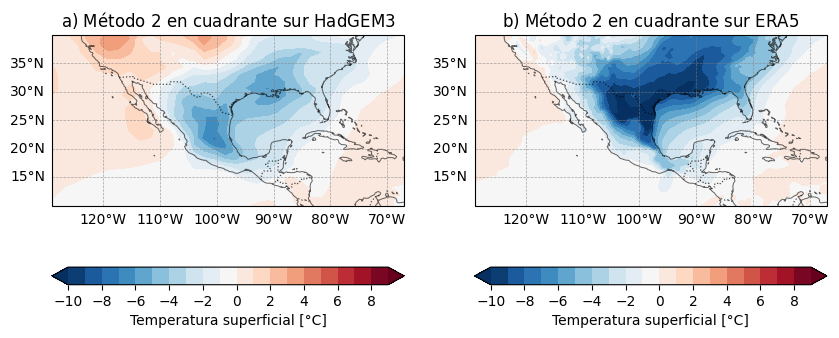

In [373]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[0]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(anomaliaNHG.lon, anomaliaNHG.lat, anomaliaNHG, levels=np.arange(-10, 10, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect = patches.Rectangle((255, 22), 262-255, 27-22, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect)
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('a$)$ HadGEM3 cuadrante norte', fontsize=12)

# # MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[1]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(anomaliaNE5.longitude, anomaliaNE5.latitude, anomaliaNE5, levels=np.arange(-10, 10, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect2 = patches.Rectangle((255, 22), 262-255, 27-22, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect2)
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('b$)$ ERA5 cuadrante norte', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(anomaliaSHG.lon, anomaliaSHG.lat, anomaliaSHG, levels=np.arange(-10,10,1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect3 = patches.Rectangle((255, 17), 262-255, 22-17, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect3)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('a$)$ Método 2 en cuadrante sur HadGEM3', fontsize=12)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(anomaliaSE5.longitude, anomaliaSE5.latitude, anomaliaSE5, levels=np.arange(-10,10,1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect4 = patches.Rectangle((255, 17), 262-255, 22-17, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect4)

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('b$)$ Método 2 en cuadrante sur ERA5', fontsize=12)

# plt.tight_layout()
# plt.subplots_adjust(top=.95)
# plt.suptitle('Temperatura durante eventos CAO en dos cuadrantes',fontsize=14,color="k",fontstyle='italic',fontweight='bold');


plt.savefig('figs/61_TanomaliaCAO_NyS')

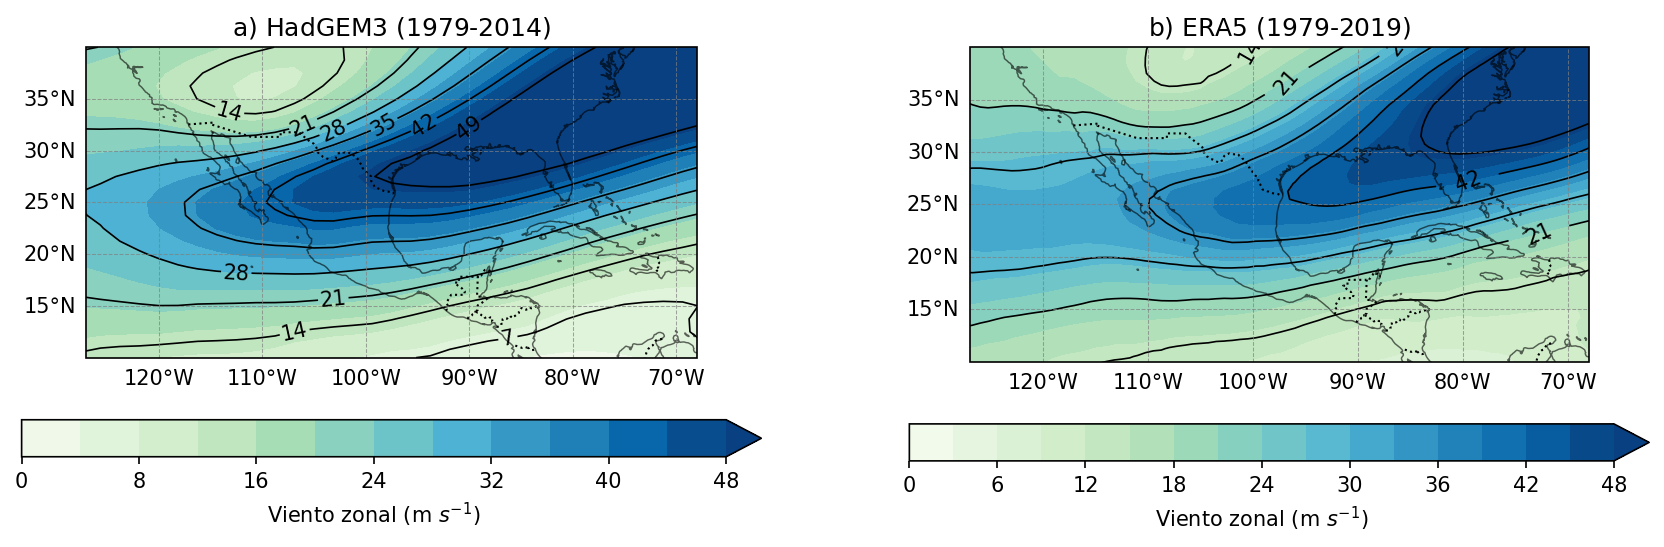

In [235]:
# Crear figura
fig = plt.figure(figsize=(14, 4), dpi=150)
fig.set_constrained_layout_pads(w_pad=1.0, h_pad=0.5)  # Reduce el espacio entre gráficos

# Subplot 1
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7, alpha=0.6)
cs = ax1.contourf(usCAOHG.lon, usCAOHG.lat, usCAOHG, levels=np.arange(0, 50, 4), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax1.contour(usCAOHG.lon, usCAOHG.lat, usCAOHG, levels=np.arange(0, 50, 7), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
plt.title('a$)$ HadGEM3 (1979-2014)', fontsize=12)

# Subplot 2
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.7, alpha=0.6)
cs = ax2.contourf(usCAOE5.longitude, usCAOE5.latitude, usCAOE5, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax2.contour(usCAOE5.longitude, usCAOE5.latitude, usCAOE5, levels=np.arange(0, 50, 7), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
plt.title('b$)$ ERA5 (1979-2019)', fontsize=12)

# Ajustes finales
plt.subplots_adjust(top=0.8)
# plt.suptitle('Viento zonal promedio a 200 hPa durante eventos CAO', fontsize=14, color="k", fontstyle='italic', fontweight='bold')
plt.savefig("figs/8_VmeanCAO.png", bbox_inches='tight')


###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatra superficial en CAOS con dos métodos </i> </h1>

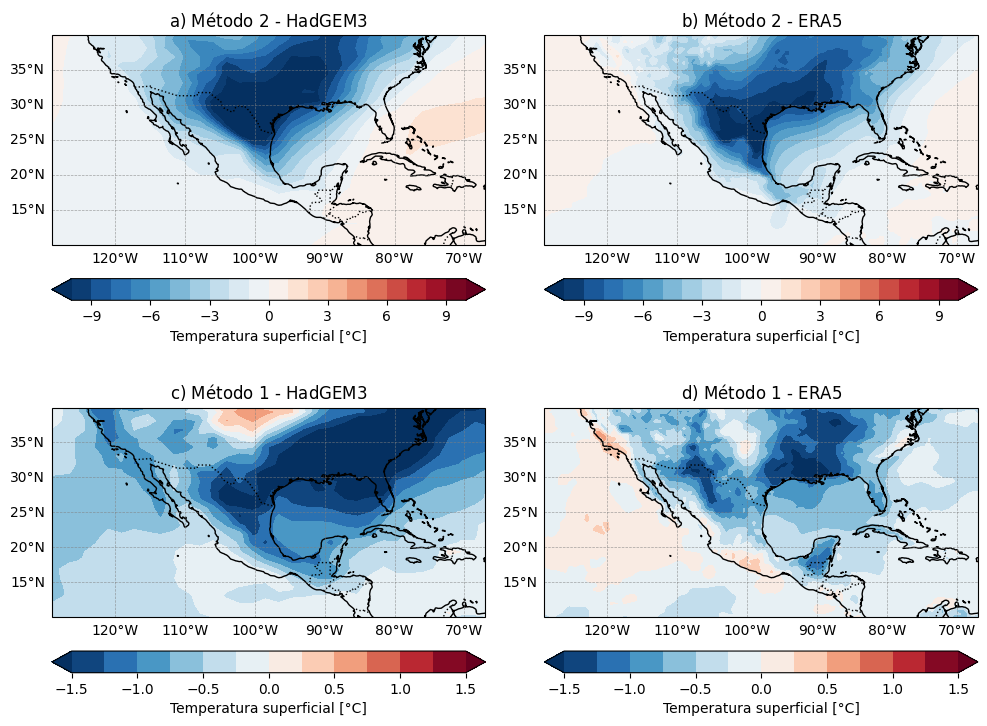

In [240]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines()
cs = ax.contourf(anomaliaHG .lon, anomaliaHG.lat, anomaliaHG, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('a$)$ Método 2 - HadGEM3', fontsize=12)

# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines()
cs = ax.contourf(anomaliaE5.longitude, anomaliaE5.latitude, anomaliaE5, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('b$)$ Método 2 - ERA5', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[2]
ax.coastlines()
cs = ax.contourf(tempsHGday_mean.lon, tempsHGday_mean.lat, tempsHGday_mean, levels=np.arange(-1.5, 1.51, 0.25), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('c$)$ Método 1 - HadGEM3', fontsize=12)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[3]
ax.coastlines()
cs = ax.contourf(tempsE5day_mean.longitude, tempsE5day_mean.latitude, tempsE5day_mean, levels=np.arange(-1.5, 1.51, 0.25), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
ax.set_title('d$)$ Método 1 - ERA5', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Anomalías de temperatura durante eventos CAO',fontsize=14,color="k",fontstyle='italic',fontweight='bold');


plt.savefig('figs/7_metodosCAO')

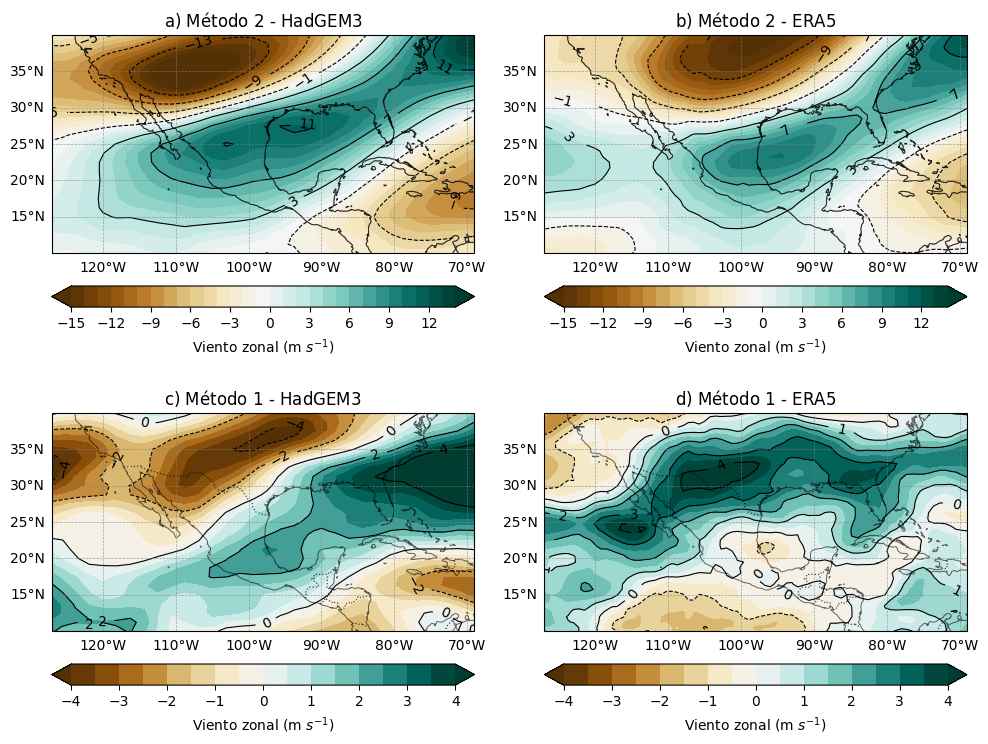

In [369]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()


# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(uanomaliaHG.lon, uanomaliaHG.lat, uanomaliaHG, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax.contour(uanomaliaHG.lon, uanomaliaHG.lat, uanomaliaHG, levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.coastlines(linewidth=0.7,alpha=0.6)
ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('a$)$ Método 2 - HadGEM3', fontsize=12)


# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(uanomaliaE5.longitude, uanomaliaE5.latitude, uanomaliaE5, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax.contour(uanomaliaE5.longitude, uanomaliaE5.latitude, uanomaliaE5, levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.coastlines(linewidth=0.7,alpha=0.6)
ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('b$)$ Método 2 - ERA5', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(usHGday_mean .lon, usHGday_mean .lat, usHGday_mean, levels=np.arange(-4, 4.1, 0.5), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax.contour(usHGday_mean .lon, usHGday_mean .lat, usHGday_mean, levels=np.arange(-4, 4.5, 2),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('c$)$ Método 1 - HadGEM3', fontsize=12)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs = ax.contourf(usE5day_mean.longitude, usE5day_mean.latitude, usE5day_mean, levels=np.arange(-4, 4.1, 0.5), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax.contour(usE5day_mean.longitude, usE5day_mean.latitude, usE5day_mean,levels=np.arange(-4,4.5,1),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('d$)$ Método 1 - ERA5', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Viento zonal durante eventos CAO',fontsize=14,color="k",fontstyle='italic',fontweight='bold');


plt.savefig('figs/9_metodosCAOyviento')
